In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
from scipy.spatial import distance
import time
from IPython.display import clear_output

Let $X = \{X_i\}_{i \ge 1}$ be a homogeneous Poisson point process with intensity 1 on $\mathbb{R}^2$. The following function returns one realization of the Poisson points in a square. The size of the square is $n$ plus a value dependent on the distances of the points in the inner square. The array <code>x</code> conatains the points in the inner square and the array <code>z</code> the points in the outer envelope.

In [2]:
def onePath(n,intensity):
    #Generate points in the inner square
    numberOfPointsInInnerSquare = 0
    while numberOfPointsInInnerSquare <= 1:
        numberOfPointsInInnerSquare = np.random.poisson(n*n*intensity)
    xCoordinates = np.random.uniform(0,n,numberOfPointsInInnerSquare)
    yCoordinates = np.random.uniform(0,n,numberOfPointsInInnerSquare)
    x = np.vstack((xCoordinates, yCoordinates)).T
    
    #Calculate the required length bounds for the outer square
    addOnDistanceToSquare = 0
    
    #Divide the outer square setminus the inner square in 4 rectangles and generate points in each rectangle
    numberOfPointsInOuterRectangles = []
    for i in range(2):
        numberOfPointsInOuterRectangles.append(np.random.poisson(n*addOnDistanceToSquare*intensity))
    for i in range(2):
        numberOfPointsInOuterRectangles.append(np.random.poisson((n+2*addOnDistanceToSquare)*addOnDistanceToSquare*intensity))
    xCoordinates = np.random.uniform(-addOnDistanceToSquare,0,numberOfPointsInOuterRectangles[0])
    yCoordinates = np.random.uniform(0,n,numberOfPointsInOuterRectangles[0])
    xCoordinates = np.append(xCoordinates,np.random.uniform(n,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[1]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(0,n,numberOfPointsInOuterRectangles[1]))
    xCoordinates = np.append(xCoordinates,np.random.uniform(-addOnDistanceToSquare,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[2]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(-addOnDistanceToSquare,0,numberOfPointsInOuterRectangles[2]))
    xCoordinates = np.append(xCoordinates,np.random.uniform(-addOnDistanceToSquare,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[3]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(n,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[3]))
    z = np.vstack((xCoordinates, yCoordinates)).T
    return x, z

Scatter of a random realization.

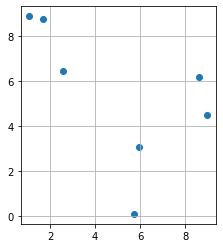

In [3]:
x,z = onePath(10,1.0/10)
plt.scatter(x.T[0],x.T[1])
plt.scatter(z.T[0],z.T[1])
plt.gcf().gca().set_aspect('equal')
plt.grid()
plt.show()

Executing the function <code>onePath(n)</code> over some number of paths.

Creating Tikz picture

In [ ]:
np.random.seed(1234)
n = 100
intensity = 10.0/n

points = []


coordinates_inner, coordinates_outer = onePath(n, intensity)

g = nx.Graph()
for x, y in coordinates_inner:
    g.add_node((x, y), x=x, y=y)
for x, y in coordinates_outer:
    g.add_node((x, y), x=x, y=y)
        
for x in g.nodes():
    points.append([x[0],x[1]])
    
borders_string = ["\\draw[draw=gray!30, line width=0.25mm] (-2.5,-2.5) rectangle ++(102.5,102.5);\n"]

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (10pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

tikz = ''.join(borders_string + points_string)
tikz = '\\begin{tikzpicture}[scale=.036]\n' + '\\begin{scope}\n' + tikz + '\\end{scope}\n' + '\\end{tikzpicture}\n'

fname = 'poissonPoints.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex